# Page View Time Series Visualizer


In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


register_matplotlib_converters() 

#Esta línea llama a la función register_matplotlib_converters(). Esta función registra convertidores de pandas con matplotlib.
# Esto es necesario porque pandas utiliza sus propios tipos de datos para las fechas y los tiempos que necesitan ser convertidos a los tipos de datos de matplotlib para el trazado.

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.


In [60]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates = True)
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [61]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
(df['value'] <= df['value'].quantile(1-0.025))]

df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


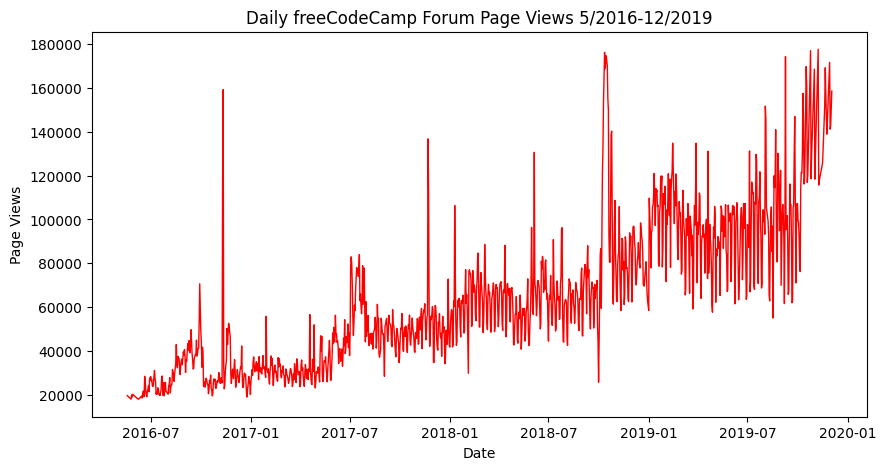

In [62]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10,5))

#Dibuja la linea
ax.plot(df.index, df['value'], 'r' , linewidth=1)

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

    # Mostrar la gráfica
plt.show()



Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


In [63]:
df_bar = df.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month #Crea una columnna con el mes asociado a la instancia a partir de la columna de la fecha
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year #Crea una columnna con el año asociado a la instancia a partir de la columna de la fecha


df_bar = df_bar.groupby(['year', 'month'])['value'].mean() # Los reoderna en funcion del mes y del año y les calcula la media
df_bar = df_bar.unstack() # Cambio de formato a uno como si fuera un dataframe

df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


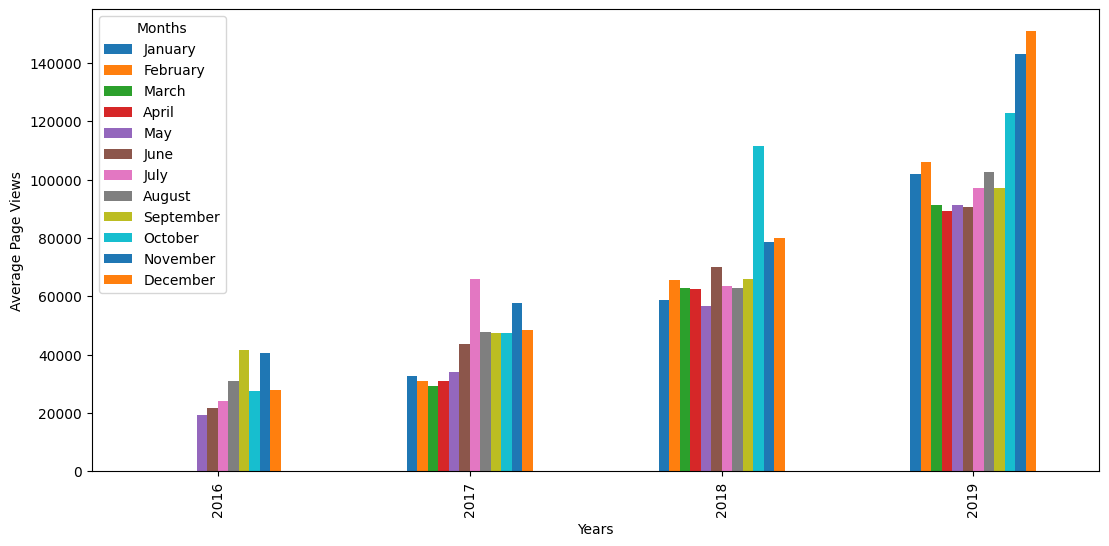

In [84]:
fig = df_bar.plot(kind='bar', figsize=(13,6)).figure


plt.title('')
plt.xlabel('Years', fontsize=10)
plt.ylabel('Average Page Views', fontsize=10)


plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], loc='upper left', title='Months', fontsize=10)

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.


In [85]:
df_box = df.copy()
df_box.reset_index(inplace=True) #Esta línea restablece el índice del DataFrame df_box. 
#                   El argumento inplace=True significa que los cambios se realizan directamente en el DataFrame df_box y no se devuelve un nuevo DataFrame.


df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['month_num'] = df_box['date'].dt.month #Genera numeros para cada mes
df_box = df_box.sort_values('month_num')  #Los ordena 

C:\Users\jugab\AppData\Local\Temp\ipykernel_17660\2010393386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[0] = sns.boxplot(ax=axes[0], data=df_box, x='year', y="value", palette='Set3')
C:\Users\jugab\AppData\Local\Temp\ipykernel_17660\2010393386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[1] = sns.boxplot(ax=axes[1], data=df_box, x='month', y="value", palette='Set3')


Text(0, 0.5, 'Page Views')

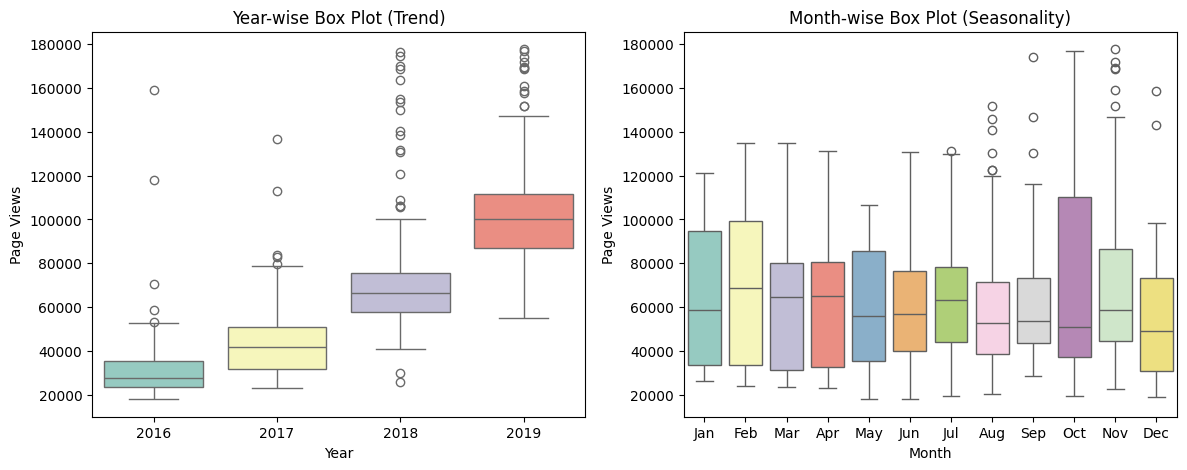

In [87]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,5))

axes[0] = sns.boxplot(ax=axes[0], data=df_box, x='year', y="value", palette='Set3')
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1] = sns.boxplot(ax=axes[1], data=df_box, x='month', y="value", palette='Set3')
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

